### Red neuronal de base radial

Las redes neuronales de base radial (RBF, por sus siglas en inglés, Radial Basis Function) son un tipo de red neuronal artificial que se utiliza en aprendizaje supervisado y no supervisado. Estas redes se llaman "radiales" porque utilizan funciones de base radial como funciones de activación en sus neuronas.

Una descripción básica de cómo funcionan las RBF:

1. Capa de entrada: En esta capa, se introducen los datos de entrada. Cada neurona en esta capa está asociada a una característica específica del conjunto de datos.

2. Capa oculta: Esta es la capa más distintiva de las RBF. Cada neurona en esta capa utiliza una función de base radial como su función de activación. La función de base radial generalmente toma la forma de una campana gaussiana y depende de la distancia entre la entrada y un centro específico asociado a la neurona. Las neuronas en esta capa se utilizan para realizar transformaciones no lineales de los datos de entrada.

3. Capa de salida: En esta capa, se realizan las operaciones de salida, que pueden variar según la tarea que esté realizando la red neuronal. Puede ser una regresión, clasificación u otra tarea, dependiendo de la configuración de la red.

Las redes neuronales de base radial son conocidas por su capacidad para aproximar funciones complejas y resolver problemas de regresión no lineal. Son especialmente útiles en aplicaciones donde la relación entre las características de entrada y la salida es difícil de modelar utilizando métodos lineales.

En el contexto de la ciencia de datos y el aprendizaje automático, las RBF son una técnica útil para abordar problemas que requieren una representación no lineal de los datos, aunque es importante destacar que existen otras arquitecturas de redes neuronales, como las redes neuronales convolucionales (CNN) y las redes neuronales recurrentes (RNN), que se utilizan en diferentes escenarios.

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


df = pd.read_csv('exploracionPerfiles.csv', sep=',', decimal='.', encoding='utf-8')

In [89]:
df.head(5)

,CorreoElectronico,Edad,Genero,Ubicacion,EstadoCivil,ActividadesCitas,Hobbies,FrecuenciaCitas,Organizacion,FlexibilidadHoraria,...,ActividadesClima,Cocina,RestriccionesAlimentarias,Deportes,InteresesCulturales,EntornoCitas,FormalidadCitas,Vestimenta,Disponibilidad,FlexibilidadHoraria.1
0,mahuitzic65@gmail.com,20,[5],[6],1,"[14, 16, 28, 10, 7]","[11, 21, 10, 30, 29]",[2],3,3,...,[1],"[5, 10]",[2],"[5, 17]","[29, 32, 25, 46, 34, 2, 45, 14, 24, 5, 2, 31, ...",[2],[3],[2],[5],3.0
1,aguilarvaleria004@gmail.com,22,[5],[8],1,"[13, 5, 12, 28, 17]","[5, 22, 13, 16, 8]",[2],4,3,...,[1],"[5, 4, 1]",[1],"[5, 7, 20, 11]","[57, 9, 23, 52, 2, 29, 32, 25, 46, 34, 2, 27, 38]",[2],[2],[3],"[10, 4, 8]",3.0
2,aguilarbjimena@gmail.com,21,[5],[8],1,"[13, 30, 27, 26, 24]","[21, 23, 1, 22, 4]",[2],5,4,...,[1],"[5, 7, 10]",[4],"[5, 20]","[57, 9, 23, 52, 2, 53, 28, 47, 13, 2, 51, 12, ...",[1],[2],[1],[7],4.0
3,dcr26mer@gmail.com,20,[5],[20],1,"[13, 12, 14, 26]","[11, 17, 21, 20, 6]",[2],5,3,...,[1],"[5, 7, 4]",[1],[7],"[57, 9, 23, 52, 2, 53, 28, 47, 13, 2, 31, 26, ...",[2],[3],[1],"[9, 4]",3.0
4,cdenisse618@gmail.com,20,[5],[10],2,"[18, 15, 20, 28, 24, 3]","[17, 14, 21, 4]",[2],3,4,...,[1],"[5, 10]",[1],"[5, 17, 20, 11]",[54],[2],[2],[2],[1],4.0


In [90]:
len(df)

112

Separar datos de entrenamiento y prueba

In [91]:
from sklearn.model_selection import train_test_split

y = df['Genero']
X = df.iloc[:, 4:26]

print(X.shape)
print(y.shape)

Realiza one-hot encoding de las características categóricas

In [93]:
X = pd.get_dummies(X, columns=['ActividadesCitas', 'Hobbies', 'FrecuenciaCitas', 'InicioCitas', 'DistanciaAceptable', 'PresupuestoGeneral', 'PresupuestoEspecial', 'DuracionCitas', 'ActividadesClima', 'Cocina', 'RestriccionesAlimentarias', 'Deportes', 'InteresesCulturales', 'EntornoCitas', 'FormalidadCitas', 'Vestimenta', 'Disponibilidad'])

Contar los valores NaN

In [94]:
df.isnull().sum()

CorreoElectronico            0
Edad                         0
Genero                       0
Ubicacion                    0
EstadoCivil                  0
ActividadesCitas             0
Hobbies                      0
FrecuenciaCitas              0
Organizacion                 0
FlexibilidadHoraria          0
InicioCitas                  0
DistanciaAceptable           0
PresupuestoGeneral           0
PresupuestoEspecial          0
DuracionCitas                0
ImportanciaClima             0
ActividadesClima             0
Cocina                       0
RestriccionesAlimentarias    0
Deportes                     0
InteresesCulturales          0
EntornoCitas                 0
FormalidadCitas              0
Vestimenta                   0
Disponibilidad               0
FlexibilidadHoraria.1        2
dtype: int64

Eliminar toda la fila si hay un NaN en alguna columna

In [95]:
df = df.dropna(axis=0, how='any')

Contar los valores NaN

In [96]:
X.isnull().sum()

EstadoCivil                  0
Organizacion                 0
FlexibilidadHoraria          0
ImportanciaClima             0
FlexibilidadHoraria.1        2
                            ..
Disponibilidad_[9, 10, 5]    0
Disponibilidad_[9, 4, 8]     0
Disponibilidad_[9, 4]        0
Disponibilidad_[9, 5, 4]     0
Disponibilidad_[9]           0
Length: 475, dtype: int64

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Imprimir la forma de los datos de entrenamiento y prueba

In [98]:

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(89, 475)
(23, 475)
(89,)
(23,)


Mostrar todos los tipos de datos de X 

In [99]:
X.dtypes

EstadoCivil                    int64
Organizacion                   int64
FlexibilidadHoraria            int64
ImportanciaClima               int64
FlexibilidadHoraria.1        float64
                              ...   
Disponibilidad_[9, 10, 5]       bool
Disponibilidad_[9, 4, 8]        bool
Disponibilidad_[9, 4]           bool
Disponibilidad_[9, 5, 4]        bool
Disponibilidad_[9]              bool
Length: 475, dtype: object

Supongamos que 'y_train' es una columna de tu DataFrame

In [100]:
y_train = df['EstadoCivil'].values.astype(np.int16)  # Cambiar a float32



### Modelo con Salida Gaussiana (TensorFlow):

1. **Capa de Entrada:**
   - `input_layer = Input(shape=(469,))`: Define una capa de entrada con 469 nodos, correspondientes a las características de entrada.

2. **Capa de Salida:**
   - `output_layer = Dense(2)(input_layer)`: Define una capa de salida con 2 nodos, uno para la media y otro para la desviación estándar en una distribución Gaussiana.

3. **Creación y Compilación del Modelo:**
   - `model = Model(inputs=input_layer, outputs=output_layer)`: Crea el modelo con la capa de entrada y salida.
   - `model.compile(optimizer='adam', loss='mean_squared_error')`: Compila el modelo con el optimizador Adam y la función de pérdida de error cuadrático medio.

4. **Entrenamiento del Modelo:**
   - `model.fit(X_train, y_train, epochs=50, batch_size=10)`: Entrena el modelo con los datos de entrenamiento (`X_train`, `y_train`) durante 50 épocas.

5. **Evaluación del Modelo:**
   - `loss = model.evaluate(X_test, y_test)`: Evalúa el modelo en el conjunto de prueba y muestra la pérdida.

### Modelo con Red Neuronal Artificial (scikit-learn):

1. **Normalización de Datos:**
   - `scaler = StandardScaler()`: Inicializa un escalador estándar.
   - `scaler.fit(X_train)`: Ajusta el escalador a los datos de entrenamiento.
   - `X_train = scaler.transform(X_train)`: Normaliza los datos de entrenamiento.
   - `X_test = scaler.transform(X_test)`: Normaliza los datos de prueba.

2. **Red Neuronal Artificial (MLP):**
   - `mlp = MLPClassifier(hidden_layer_sizes=(26, 26, 26), max_iter=500)`: Crea una red neuronal artificial con tres capas ocultas de 26 nodos cada una y un máximo de 500 iteraciones.
   - `mlp.fit(X_train, y_train.values.ravel())`: Entrena la red neuronal con los datos de entrenamiento.

3. **Predicciones y Evaluación:**
   - `predictions = mlp.predict(X_test)`: Realiza predicciones en el conjunto de prueba.
   - `confusion_matrix(y_test, predictions)`: Muestra la matriz de confusión.
   - `classification_report(y_test, predictions)`: Muestra el informe de clasificación.

### Comentarios:
- El modelo con salida Gaussiana podría ser apropiado para problemas de regresión con incertidumbre en las predicciones.
- El modelo MLP es más común para problemas de clasificación y muestra su evaluación en términos de matriz de confusión y reporte de clasificación.


In [103]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Define la capa de entrada
input_layer = Input(shape=(469,))

# Define la capa de salida con una distribución Gaussiana
output_layer = Dense(2)(input_layer)  # Dos salidas para media y desviación estándar

# Crea el modelo
model = Model(inputs=input_layer, outputs=output_layer)
 
# Compila el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

#Longitud de la entrada
print(len(X_train))
print(len(y_train))


89
110


In [ ]:
# Entrena el modelo
model.fit(X_train, y_train, epochs=50, batch_size=10)

# Evalúa el modelo en el conjunto de prueba
loss = model.evaluate(X_test, y_test)
print(f"Pérdida en el conjunto de prueba: {loss}")

In [ ]:
#crear una red neuronal radial con los datos de entrenamiento y prueba con keras 
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(26,26,26),max_iter=500)
mlp.fit(X_train,y_train.values.ravel())

predictions = mlp.predict(X_test)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))




[[ 2  0  9]
 [ 0  0  0]
 [ 1  1 15]]
              precision    recall  f1-score   support

         [1]       0.67      0.18      0.29        11
         [3]       0.00      0.00      0.00         0
         [5]       0.62      0.88      0.73        17

    accuracy                           0.61        28
   macro avg       0.43      0.35      0.34        28
weighted avg       0.64      0.61      0.56        28



/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


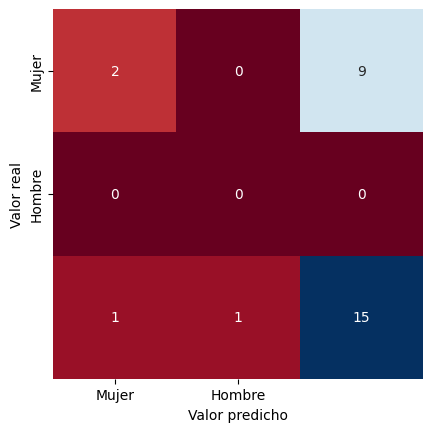

In [ ]:
# graficar la matriz de confusión con seaborn
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,
xticklabels=['Mujer', 'Hombre'], yticklabels=['Mujer', 'Hombre'])
plt.xlabel('Valor predicho')
plt.ylabel('Valor real')
plt.show()